<a href="https://colab.research.google.com/github/ianxdxd/ML-Study/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [46]:
class Regression:
    def __init__(self, n_iter: int, l_rate: float):
        self.n_iter = n_iter
        self.l_rate = l_rate
        self.w = None
        self.b = 0
        self.error = 0

    def init_weights(self, n_features: float):
        # use [-1/sqr(n), +1/sqr(n)] to initiliaze weights
        lim = 1 / np.sqrt(n_features)
        self.w = np.random.uniform(-lim, lim, (n_features,))

    def regularization(self):
        return 0

    def predict(self, X):
        return np.dot(X, self.w) + self.b

    def fit(self, X, y):
        scaler = StandardScaler()
        X = scaler.fit_transform(X) # apply z-score to normalize data and avoid overflow
        n_samples, n_features = X.shape
        self.init_weights(n_features)
        for i in range(self.n_iter):
            y_pred = self.predict(X)
            self.error = y - y_pred
            reg_factor = self.regularization()
            grad_w = -2 * np.dot(X.T, self.error) / n_samples + reg_factor # Compute the grad of the MSE loss function
            grad_b = -2 * np.sum(self.error) / n_samples
            self.w -= self.l_rate * grad_w
            self.b -= self.l_rate * grad_b


class LinearRegression(Regression):
    def __init__(self, n_iter: int, l_rate: float):
        super(LinearRegression, self).__init__(n_iter, l_rate)

    def fit_gradientDescent(self, X, y):
        super(LinearRegression, self).fit(X, y)

    def fit_leastSquares(self, X, y):
        X_mean = np.mean(X)
        y_mean = np.mean(y)

        numerator = 0
        denominator = 0
        for i in range(X.shape[0]):
            numerator += (X[i] - X_mean) * (y[i] - y_mean)
            denominator += (X[i] - X_mean) ** 2

        m = numerator / denominator
        c = y_mean - m * X_mean
        return m, c

    def fit_leastSquares_MoorePenrose(self, X, y):
        X = np.hstack((X, np.ones(X.shape[0]).reshape(-1, 1)))  # Add bias term
        # self.weight = np.dot(np.linalg.pinv(X.T.dot(X)), X.T).dot(y) # direct way

        '''
        SVD method is computationally expansive but more numerically stable
        compared to the direct way
        Xinv = V@D^+@U^T
        '''
        U, D, V = np.linalg.svd(X.T.dot(X))  # SVD decomposition
        D = np.diag(D)  # Convert D to a diagonal matrix
        X_inv = V.dot(np.linalg.pinv(D)).dot(U.T) # moore penrose pseudo inverse
        self.weight = X_inv.dot(X.T).dot(y)
        return self.weight[0], self.weight[1] # m and c

class LassoRegression(Regression):

    # Also known as L1 Regression

    def __init__(self, n_iter: int, l_rate: float, alpha: float):
        super(LassoRegression, self).__init__(n_iter, l_rate)
        self.alpha = alpha

    def predict(self, X):
        return np.dot(X, self.w) + self.b

    def regularization(self):
        return self.alpha * np.sign(self.w)


        '''
        alpha : regularization parameters
        l1_regulatization : L1 norm
        np.sign(self.w): return and element-wise indication fo the sign of a number

        Lasso Regression is a regularization technique, applying a regularized
        term to prevent overfitting.

        This type of regression may not outstand the perfomace of a simple
        linear regression. Although, it is proven to be useful in datasets with
        many features.
        '''

class RidgeRegression(Regression):

    # Known as L2 Regression

    def __init__(self, n_iter: int, l_rate: float, alpha: float):
        super().__init__(n_iter, l_rate)
        self.alpha = alpha

    def regularization(self):
        return self.alpha * (2*(self.w))


class ElasticNetRegression(Regression):
    def __init__(self, n_iter: int, l_rate: float, alpha: float, l1_ratio: float):
        super().__init__(n_iter, l_rate)
        self.l1_ratio = l1_ratio
        self.alpha = alpha

    def l1_l2_regularization(self):
        regularized_l1 = self.l1_ratio * np.linalg.norm(self.w)
        regularized_l2 = (1-self.l1_ratio) * 0.5 * (self.w)**2
        return self.alpha * (regularized_l1 + regularized_l2)

    def regularization(self):
        regularized_l1 = self.l1_ratio * np.sign(self.w)
        regularized_l2 = (1-self.l1_ratio) * self.w
        return self.alpha * (regularized_l1 + regularized_l2)

Final MSE using Gradient Descent:  0.825213449857316
Final MSE using Least Squares:  0.8251417951111577
Final MSE using Least Squares Moore Penrose:  0.8251417951111574
Final MSE using Lasso Regression:  0.825243640117925
Final MSE using Ridge Regression:  0.8285148538079613
Final MSE using Elastic Net Regression:  0.825446516520406


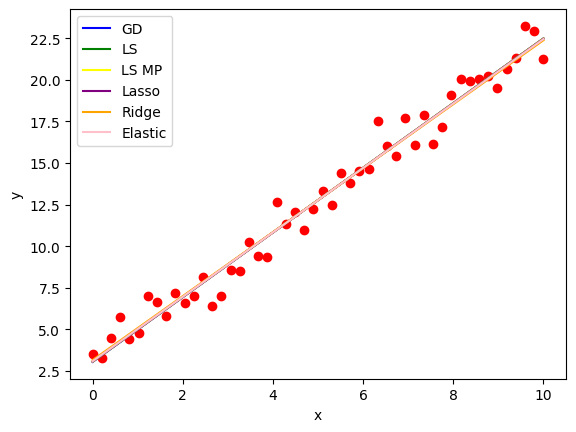

In [47]:
np.random.seed(42)
# y = 2x + 3
X = np.linspace(0, 10, 50)
y = 2 * X + 3 + np.random.normal(0, 1, X.shape) # add noise to make it more realistic

reg = LinearRegression(n_iter=1000, l_rate=0.01)
reg.fit(X.reshape(-1,1), y)
y_line_gd = reg.predict(X.reshape(-1, 1))
final_mse_gd = np.mean((y - y_line_gd) ** 2)

m,c = reg.fit_leastSquares(X.reshape(-1,1), y)
y_line_ls = m*X + c
final_mse_ls = np.mean((y - y_line_ls) ** 2)

m_mp, c_mp = reg.fit_leastSquares_MoorePenrose(X.reshape(-1,1), y)
y_line_ls_mp = m_mp*X + c_mp
final_mse_ls_mp = np.mean((y - y_line_ls_mp) ** 2)

lasso = LassoRegression(n_iter=1000, l_rate=0.01, alpha=0.1)
lasso.fit(X.reshape(-1,1), y)
y_line_lasso = lasso.predict(X.reshape(-1, 1))
final_mse_lasso = np.mean((y - y_line_lasso) ** 2)

ridge = RidgeRegression(n_iter=1000, l_rate=0.01, alpha=0.1)
ridge.fit(X.reshape(-1,1), y)
y_line_ridge = ridge.predict(X.reshape(-1, 1))
final_mse_ridge = np.mean((y - y_line_ridge) ** 2)

elastic = ElasticNetRegression(n_iter=1000, l_rate=0.01, alpha=0.1, l1_ratio=0.5)
elastic.fit(X.reshape(-1,1), y)
y_line_elastic = elastic.predict(X.reshape(-1, 1))
final_mse_elastic = np.mean((y - y_line_elastic) ** 2)

print("Final MSE using Gradient Descent: ", final_mse_gd)
print("Final MSE using Least Squares: ", final_mse_ls)
print("Final MSE using Least Squares Moore Penrose: ", final_mse_ls_mp)
print("Final MSE using Lasso Regression: ", final_mse_lasso)
print("Final MSE using Ridge Regression: ", final_mse_ridge)
print("Final MSE using Elastic Net Regression: ", final_mse_elastic)

plt.scatter(X, y, color='red')
plt.plot(X, y_line_gd, color='blue', label='GD')
plt.plot(X, y_line_ls, color='green', label='LS')
plt.plot(X, y_line_ls_mp, color='yellow', label='LS MP')
plt.plot(X, y_line_lasso, color='purple', label='Lasso')
plt.plot(X, y_line_ridge, color='orange', label='Ridge')
plt.plot(X, y_line_elastic, color='pink', label='Elastic')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### Using a real dataset

In [6]:
!pip install -q kaggle
from google.colab import files

In [9]:
! kaggle datasets download mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 18.8MB/s]


In [10]:
! unzip insurance.zip

Archive:  insurance.zip
  inflating: insurance.csv           


In [11]:
insurance = pd.read_csv('insurance.csv')

sex = pd.DataFrame({'sex': ['male', 'female']})
smoker = pd.DataFrame({'smoker': ['yes', 'no']})
region = pd.DataFrame({'region': ['southeast', 'southwest','northeast',' northwest']})

l_e = LabelEncoder()
insurance['sex'] = l_e.fit_transform(insurance['sex'])
insurance['smoker'] = l_e.fit_transform(insurance['smoker'])
insurance['region'] = l_e.fit_transform(insurance['region'])

y = insurance['charges'].values
X = insurance.drop('charges', inplace=True, axis=1)
X = insurance.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


0.735349618512319 0.7729148748345822
FInal MSE train:  38197948.106106296


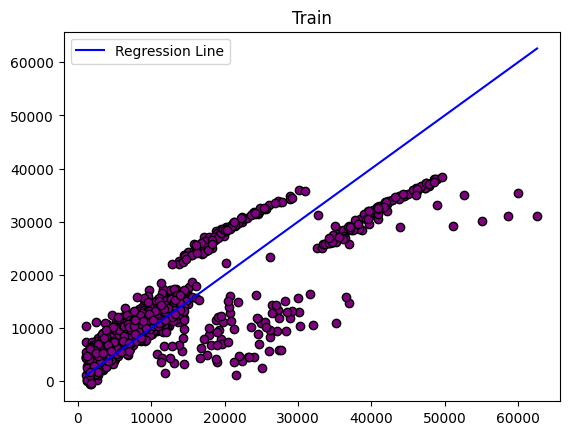

FInal MSE test:  35254677.62258172


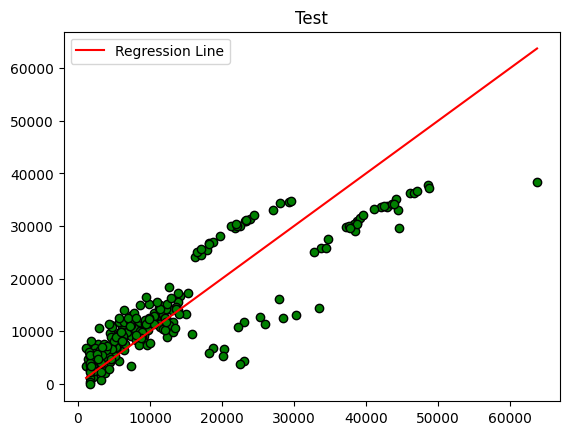

In [40]:
model = RidgeRegression(n_iter=1000, l_rate=0.01, alpha=0.1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
final_mse_train = ((np.mean((y_train - y_train_pred) ** 2)))
final_mse_test = (np.mean((y_test - y_test_pred) ** 2))

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print(r2_train, r2_test)

print("FInal MSE train: ", final_mse_train)
plt.scatter(y_train, y_train_pred, color='purple', edgecolors='black')
min_x = min(y_train)
max_x = max(y_train)
plt.plot([min_x, max_x], [min_x, max_x], color='blue', label='Regression Line')
plt.title("Train")
plt.legend()
plt.show()

print("FInal MSE test: ", final_mse_test)
plt.scatter(y_test, y_test_pred, color='green', edgecolors='black')
min_x = min(y_test)
max_x = max(y_test)
plt.plot([min_x, max_x], [min_x, max_x], color='red', label='Regression Line')
plt.title("Test")
plt.legend()
plt.show()